In [23]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("household_power_consumption.txt", sep=';')


/home/hj19/anaconda3/envs/spoof/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [25]:
data['date']=pd.date_range('2006-12-16 17:24:00', '2010-11-26 21:02:00', freq='1T')



In [26]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0,2010-11-26 20:58:00
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0,2010-11-26 20:59:00
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0,2010-11-26 21:00:00
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0,2010-11-26 21:01:00


In [27]:
data=data.drop(['Date','Time'],axis=1)

In [28]:
data=data.dropna(axis=0)

In [29]:
data=data.set_index(['date'])


In [30]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0,240.43,4,0,0,0.0
2010-11-26 20:59:00,0.944,0,240,4,0,0,0.0
2010-11-26 21:00:00,0.938,0,239.82,3.8,0,0,0.0


In [32]:
data=data.loc['2010-1-26 00:00:00':,:]

In [33]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [34]:
data=data.dropna(axis=0)

In [35]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2010-01-26 00:00:00,1.710,0.136,242.210,7.000,1.000,0.000,19.0
2010-01-26 00:01:00,1.730,0.126,242.590,7.000,1.000,0.000,19.0
2010-01-26 00:02:00,1.758,0.116,242.730,7.200,1.000,0.000,18.0
2010-01-26 00:03:00,1.770,0.116,243.640,7.200,1.000,0.000,19.0
2010-01-26 00:04:00,1.756,0.110,243.320,7.200,2.000,0.000,19.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0,240.43,4,0,0,0.0
2010-11-26 20:59:00,0.944,0,240,4,0,0,0.0
2010-11-26 21:00:00,0.938,0,239.82,3.8,0,0,0.0


In [36]:
from sklearn.preprocessing import MinMaxScaler

values = data[cols].values.reshape(-1,7)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [37]:
scaled

array([[0.16398914, 0.12099645, 0.59872437, ..., 0.01136364, 0.        ,
        0.61290324],
       [0.16607551, 0.11209965, 0.61219406, ..., 0.01136364, 0.        ,
        0.61290324],
       [0.16899644, 0.10320284, 0.617157  , ..., 0.01136364, 0.        ,
        0.58064514],
       ...,
       [0.08345504, 0.        , 0.5140028 , ..., 0.        , 0.        ,
        0.        ],
       [0.08303776, 0.        , 0.50974846, ..., 0.        , 0.        ,
        0.        ],
       [0.08282912, 0.        , 0.5044308 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [38]:
train_size = int(len(scaled) * 0.80)
#train_size=3200
val_size = int(len(scaled) * 0.10)
#val_size=400
#test_size = len(Scaled) - train_size-val_size

train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

339620 42452 42453


In [39]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [94]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+predict + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [98]:
look_back = 60
trainX, trainY = create_dataset_mul(train, look_back)
valX, valY = create_dataset_mul(val, look_back)
testX, testY = create_dataset_mul(test, look_back)
#test1X, test1Y = create_dataset_mul(test1, look_back)


339560
42392
42393


In [99]:
trainX.shape

(339560, 60, 7)

In [43]:
first_input = Input(shape=(60,7))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in0= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2)(in1)
in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(1)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')
model.summary()

checkpoint_path = "saved_weights/house_1d_.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=200, verbose=1,callbacks=[cb])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60, 7)]           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 60, 64)            2304      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 60, 64)            12352     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 60, 64)            4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1921

Epoch 26/200
339392/339560 [============================>.] - ETA: 0s - loss: 3.6311e-04
Epoch 00026: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 110us/sample - loss: 3.6323e-04 - val_loss: 5.5498e-04
Epoch 27/200
339168/339560 [============================>.] - ETA: 0s - loss: 3.6336e-04
Epoch 00027: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.6327e-04 - val_loss: 5.3987e-04
Epoch 28/200
339424/339560 [============================>.] - ETA: 0s - loss: 3.6191e-04
Epoch 00028: val_loss improved from 0.00052 to 0.00052, saving model to saved_weights/house_1d_.hdf5
339560/339560 [==============================] - 37s 110us/sample - loss: 3.6182e-04 - val_loss: 5.1737e-04
Epoch 29/200
339360/339560 [============================>.] - ETA: 0s - loss: 3.6030e-04
Epoch 00029: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 110us/sample 

Epoch 59/200
339200/339560 [============================>.] - ETA: 0s - loss: 3.3651e-04
Epoch 00059: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.3666e-04 - val_loss: 5.6756e-04
Epoch 60/200
339104/339560 [============================>.] - ETA: 0s - loss: 3.3753e-04
Epoch 00060: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.3736e-04 - val_loss: 5.5731e-04
Epoch 61/200
339264/339560 [============================>.] - ETA: 0s - loss: 3.3483e-04
Epoch 00061: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.3491e-04 - val_loss: 5.7396e-04
Epoch 62/200
339456/339560 [============================>.] - ETA: 0s - loss: 3.3593e-04
Epoch 00062: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.3588e-04 - val_loss: 5.5179e-04
Epoch 63

339232/339560 [============================>.] - ETA: 0s - loss: 3.1811e-04
Epoch 00092: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.1816e-04 - val_loss: 5.8813e-04
Epoch 93/200
339392/339560 [============================>.] - ETA: 0s - loss: 3.1710e-04
Epoch 00093: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.1727e-04 - val_loss: 5.5970e-04
Epoch 94/200
339328/339560 [============================>.] - ETA: 0s - loss: 3.1631e-04
Epoch 00094: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.1619e-04 - val_loss: 5.6994e-04
Epoch 95/200
339456/339560 [============================>.] - ETA: 0s - loss: 3.1587e-04
Epoch 00095: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.1592e-04 - val_loss: 5.8342e-04
Epoch 96/200
339424/3

Epoch 125/200
339072/339560 [============================>.] - ETA: 0s - loss: 3.0441e-04
Epoch 00125: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.0435e-04 - val_loss: 5.8203e-04
Epoch 126/200
339136/339560 [============================>.] - ETA: 0s - loss: 3.0347e-04
Epoch 00126: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.0339e-04 - val_loss: 5.9347e-04
Epoch 127/200
339264/339560 [============================>.] - ETA: 0s - loss: 3.0257e-04
Epoch 00127: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 3.0259e-04 - val_loss: 6.0898e-04
Epoch 128/200
339488/339560 [============================>.] - ETA: 0s - loss: 3.0070e-04
Epoch 00128: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 108us/sample - loss: 3.0069e-04 - val_loss: 6.2255e-04
Epoc

Epoch 158/200
339360/339560 [============================>.] - ETA: 0s - loss: 2.9266e-04
Epoch 00158: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.9285e-04 - val_loss: 6.2063e-04
Epoch 159/200
339136/339560 [============================>.] - ETA: 0s - loss: 2.9219e-04
Epoch 00159: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 108us/sample - loss: 2.9207e-04 - val_loss: 6.2078e-04
Epoch 160/200
339072/339560 [============================>.] - ETA: 0s - loss: 2.9243e-04
Epoch 00160: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.9226e-04 - val_loss: 6.4329e-04
Epoch 161/200
339552/339560 [============================>.] - ETA: 0s - loss: 2.9361e-04
Epoch 00161: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.9360e-04 - val_loss: 6.2524e-04
Epoc

Epoch 191/200
339424/339560 [============================>.] - ETA: 0s - loss: 2.8503e-04
Epoch 00191: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.8505e-04 - val_loss: 6.5297e-04
Epoch 192/200
339168/339560 [============================>.] - ETA: 0s - loss: 2.8468e-04
Epoch 00192: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 108us/sample - loss: 2.8464e-04 - val_loss: 6.6540e-04
Epoch 193/200
339232/339560 [============================>.] - ETA: 0s - loss: 2.8430e-04
Epoch 00193: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.8441e-04 - val_loss: 6.0652e-04
Epoch 194/200
339488/339560 [============================>.] - ETA: 0s - loss: 2.8453e-04
Epoch 00194: val_loss did not improve from 0.00052
339560/339560 [==============================] - 37s 109us/sample - loss: 2.8462e-04 - val_loss: 6.2633e-04
Epoc

In [44]:
model.load_weights("saved_weights/house_1d_.hdf5")

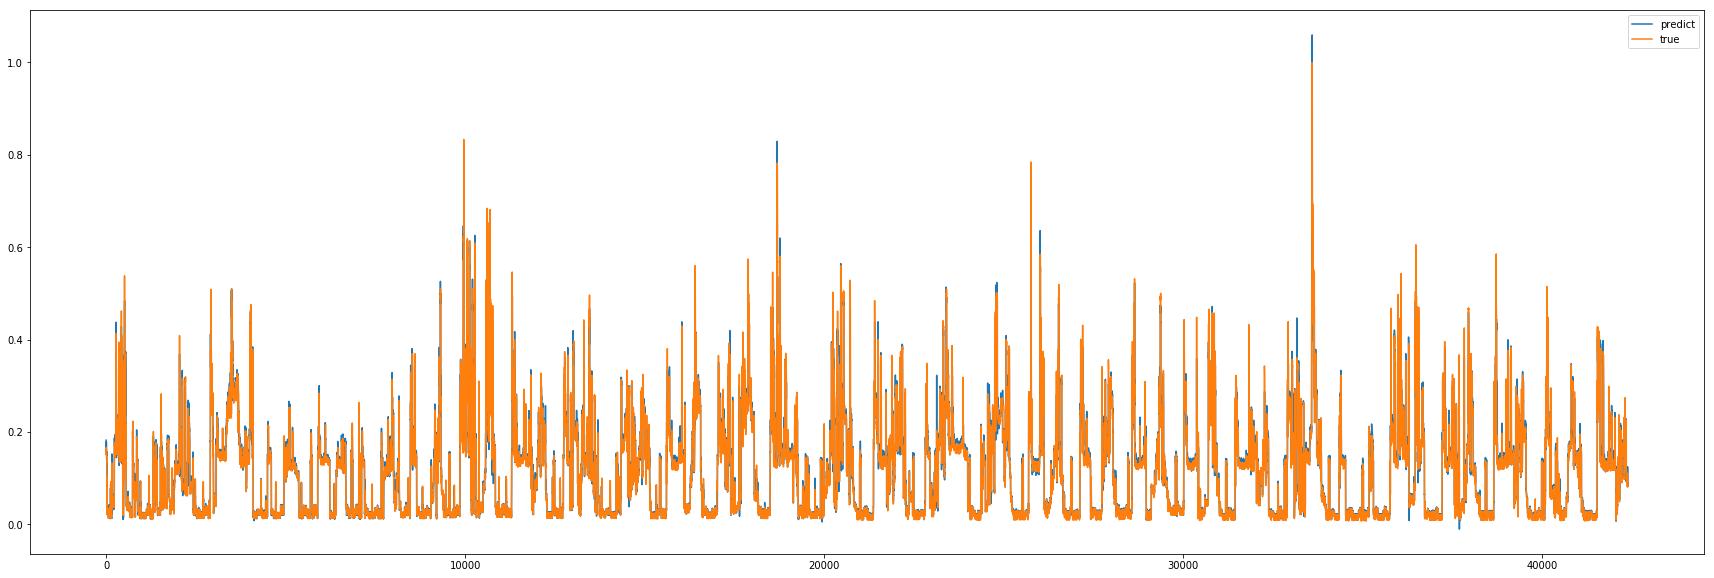

Test RMSE: 0.02161
Test MAE: 0.00953
Test MSE: 0.00047
Test RMSE: 5.47989
Test MAE: 2.41722


In [45]:
##1d(5,3,1)
from matplotlib import pyplot
from sklearn.metrics import *

yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(30,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [46]:
from tensorflow.keras.models import Model

In [47]:
first_input = Input(shape=(trainX.shape[1],trainX.shape[2]))

in1=Bidirectional(LSTM(150))(first_input)
in1=Dense(1,activation='relu')(in1)
model=Model(first_input,in1)
model.compile(optimizer='adam', loss='mse')
model.summary()
checkpoint_path = "saved_weights/houseconsump_timebilstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=100, verbose=1,callbacks=[cb])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 60, 7)]           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               189600    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 301       
Total params: 189,901
Trainable params: 189,901
Non-trainable params: 0
_________________________________________________________________
Train on 339560 samples, validate on 42392 samples
Epoch 1/100
339552/339560 [============================>.] - ETA: 0s - loss: 5.3187e-04
Epoch 00001: val_loss improved from inf to 0.00063, saving model to saved_weights/houseconsump_timebilstm.hdf5
339560/339560 [==============================] - 327s 962us/sample - loss: 5.3186e-04 - val_loss: 6.3229e-04
Epoch 2/100
339552/33956

Epoch 28/100
339552/339560 [============================>.] - ETA: 0s - loss: 3.5390e-04
Epoch 00028: val_loss improved from 0.00053 to 0.00053, saving model to saved_weights/houseconsump_timebilstm.hdf5
339560/339560 [==============================] - 319s 940us/sample - loss: 3.5390e-04 - val_loss: 5.2554e-04
Epoch 29/100
339552/339560 [============================>.] - ETA: 0s - loss: 3.5094e-04
Epoch 00029: val_loss did not improve from 0.00053
339560/339560 [==============================] - 319s 940us/sample - loss: 3.5093e-04 - val_loss: 5.3861e-04
Epoch 30/100
339552/339560 [============================>.] - ETA: 0s - loss: 3.4949e-04
Epoch 00030: val_loss improved from 0.00053 to 0.00052, saving model to saved_weights/houseconsump_timebilstm.hdf5
339560/339560 [==============================] - 319s 940us/sample - loss: 3.4948e-04 - val_loss: 5.2488e-04
Epoch 31/100
339552/339560 [============================>.] - ETA: 0s - loss: 3.4653e-04
Epoch 00031: val_loss did not improv

339552/339560 [============================>.] - ETA: 0s - loss: 2.9394e-04
Epoch 00060: val_loss did not improve from 0.00052
339560/339560 [==============================] - 319s 940us/sample - loss: 2.9393e-04 - val_loss: 5.6031e-04
Epoch 61/100
339552/339560 [============================>.] - ETA: 0s - loss: 2.9192e-04
Epoch 00061: val_loss did not improve from 0.00052
339560/339560 [==============================] - 319s 940us/sample - loss: 2.9194e-04 - val_loss: 5.7357e-04
Epoch 62/100
339552/339560 [============================>.] - ETA: 0s - loss: 2.9064e-04
Epoch 00062: val_loss did not improve from 0.00052
339560/339560 [==============================] - 319s 940us/sample - loss: 2.9063e-04 - val_loss: 5.5729e-04
Epoch 63/100
339552/339560 [============================>.] - ETA: 0s - loss: 2.8904e-04
Epoch 00063: val_loss did not improve from 0.00052
339560/339560 [==============================] - 319s 940us/sample - loss: 2.8905e-04 - val_loss: 5.8144e-04
Epoch 64/100
3395

KeyboardInterrupt: 

In [48]:
model.load_weights("saved_weights/houseconsump_timebilstm.hdf5")

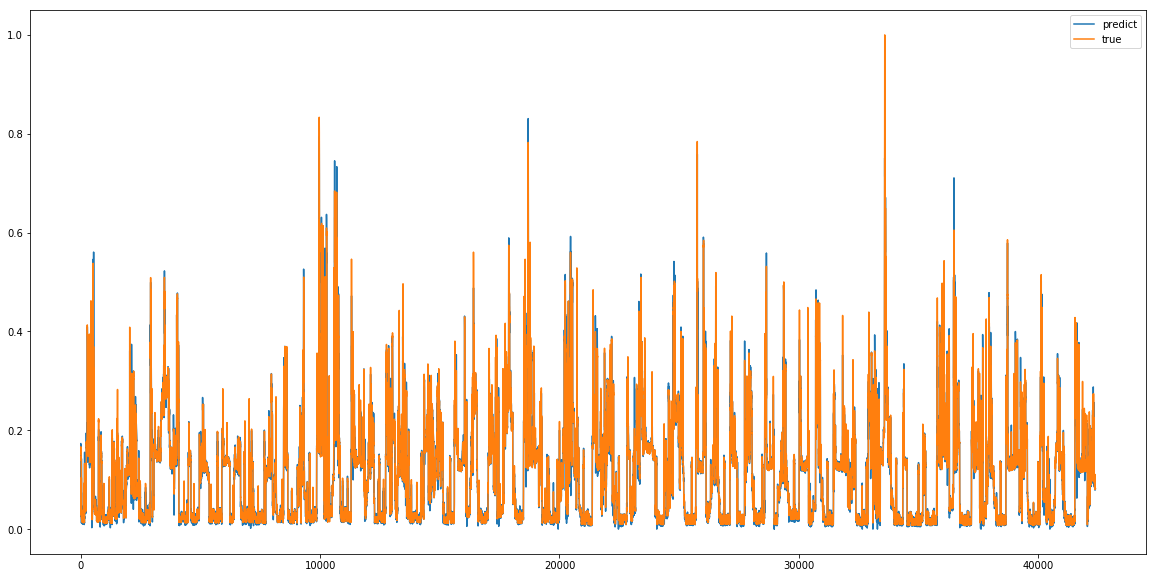

Test RMSE: 0.02107
Test MAE: 0.00838
Test MSE: 0.00044
Test RMSE: 5.34077
Test MAE: 2.12433


In [49]:
##bilstm(150)
from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [ ]:

from tensorflow.keras.models import *

first_input = Input(shape=(None,60,7))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
out1=Dense(12, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

'''
checkpoint_path = "saved_weights/housecomp_timedist_531.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
'''
# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [63]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, 60, 7)]     0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 60, 150)     94800     
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 56, 64)      48064     
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 56, 64)      4160      
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 28, 64)      0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 1792)        0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           1793

In [62]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))
#test1X = np.reshape(test1X, (test1X.shape[0],1,test1X.shape[1], test1X.shape[2] ))

ValueError: cannot reshape array of size 142615200 into shape (339560,1,1,60)

In [52]:
trainX.shape

(339560, 60, 7)

In [54]:
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 339560 samples, validate on 42392 samples
Epoch 1/200
339400/339560 [============================>.] - ETA: 0s - loss: 6.9020e-04
Epoch 00001: val_loss improved from inf to 0.00071, saving model to saved_weights/housecomp_timedist_531.hdf5
339560/339560 [==============================] - 21s 62us/sample - loss: 6.9029e-04 - val_loss: 7.1134e-04
Epoch 2/200
339000/339560 [============================>.] - ETA: 0s - loss: 5.1679e-04
Epoch 00002: val_loss improved from 0.00071 to 0.00066, saving model to saved_weights/housecomp_timedist_531.hdf5
339560/339560 [==============================] - 21s 61us/sample - loss: 5.1662e-04 - val_loss: 6.5645e-04
Epoch 3/200
339500/339560 [============================>.] - ETA: 0s - loss: 4.9155e-04
Epoch 00003: val_loss improved from 0.00066 to 0.00064, saving model to saved_weights/housecomp_timedist_531.hdf5
339560/339560 [==============================] - 21s 61us/sample - loss: 4.9154e-04 - val_loss: 6.4391e-04
Epoch 4/200
338800/339560 

Epoch 32/200
339400/339560 [============================>.] - ETA: 0s - loss: 3.9722e-04
Epoch 00032: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.9717e-04 - val_loss: 5.8090e-04
Epoch 33/200
339300/339560 [============================>.] - ETA: 0s - loss: 3.9634e-04
Epoch 00033: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.9624e-04 - val_loss: 6.3263e-04
Epoch 34/200
338900/339560 [============================>.] - ETA: 0s - loss: 3.9489e-04
Epoch 00034: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.9472e-04 - val_loss: 5.8679e-04
Epoch 35/200
339400/339560 [============================>.] - ETA: 0s - loss: 3.9282e-04
Epoch 00035: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.9276e-04 - val_loss: 5.7797e-04
Epoch 36/200

339200/339560 [============================>.] - ETA: 0s - loss: 3.8153e-04
Epoch 00065: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.8146e-04 - val_loss: 5.8243e-04
Epoch 66/200
338700/339560 [============================>.] - ETA: 0s - loss: 3.8030e-04
Epoch 00066: val_loss improved from 0.00057 to 0.00057, saving model to saved_weights/housecomp_timedist_531.hdf5
339560/339560 [==============================] - 19s 57us/sample - loss: 3.8024e-04 - val_loss: 5.7029e-04
Epoch 67/200
339000/339560 [============================>.] - ETA: 0s - loss: 3.8187e-04
Epoch 00067: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - loss: 3.8178e-04 - val_loss: 6.0291e-04
Epoch 68/200
339200/339560 [============================>.] - ETA: 0s - loss: 3.7872e-04
Epoch 00068: val_loss did not improve from 0.00057
339560/339560 [==============================] - 19s 57us/sample - lo

Epoch 98/200
338800/339560 [============================>.] - ETA: 0s - loss: 3.7183e-04
Epoch 00098: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.7197e-04 - val_loss: 5.7975e-04
Epoch 99/200
339500/339560 [============================>.] - ETA: 0s - loss: 3.7121e-04
Epoch 00099: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.7120e-04 - val_loss: 6.1992e-04
Epoch 100/200
338900/339560 [============================>.] - ETA: 0s - loss: 3.7135e-04
Epoch 00100: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.7143e-04 - val_loss: 6.2748e-04
Epoch 101/200
338600/339560 [============================>.] - ETA: 0s - loss: 3.7102e-04
Epoch 00101: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.7075e-04 - val_loss: 5.8389e-04
Epoch 102/

339400/339560 [============================>.] - ETA: 0s - loss: 3.6642e-04
Epoch 00131: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6647e-04 - val_loss: 5.9908e-04
Epoch 132/200
339000/339560 [============================>.] - ETA: 0s - loss: 3.6557e-04
Epoch 00132: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6553e-04 - val_loss: 6.1742e-04
Epoch 133/200
338600/339560 [============================>.] - ETA: 0s - loss: 3.6463e-04
Epoch 00133: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6510e-04 - val_loss: 5.8203e-04
Epoch 134/200
339500/339560 [============================>.] - ETA: 0s - loss: 3.6533e-04
Epoch 00134: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6550e-04 - val_loss: 5.7526e-04
Epoch 135/200
339200/3

339100/339560 [============================>.] - ETA: 0s - loss: 3.5940e-04
Epoch 00164: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.5961e-04 - val_loss: 6.3256e-04
Epoch 165/200
339100/339560 [============================>.] - ETA: 0s - loss: 3.6160e-04
Epoch 00165: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6171e-04 - val_loss: 6.3053e-04
Epoch 166/200
339000/339560 [============================>.] - ETA: 0s - loss: 3.6121e-04
Epoch 00166: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6097e-04 - val_loss: 6.0629e-04
Epoch 167/200
338700/339560 [============================>.] - ETA: 0s - loss: 3.6111e-04
Epoch 00167: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.6106e-04 - val_loss: 5.6568e-04
Epoch 168/200
339300/3

338700/339560 [============================>.] - ETA: 0s - loss: 3.5567e-04
Epoch 00197: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.5616e-04 - val_loss: 5.9328e-04
Epoch 198/200
339400/339560 [============================>.] - ETA: 0s - loss: 3.5694e-04
Epoch 00198: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.5691e-04 - val_loss: 5.8280e-04
Epoch 199/200
338600/339560 [============================>.] - ETA: 0s - loss: 3.5704e-04
Epoch 00199: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.5698e-04 - val_loss: 5.8096e-04
Epoch 200/200
339000/339560 [============================>.] - ETA: 0s - loss: 3.5666e-04
Epoch 00200: val_loss did not improve from 0.00056
339560/339560 [==============================] - 19s 57us/sample - loss: 3.5694e-04 - val_loss: 5.9702e-04


In [55]:
model.load_weights("saved_weights/housecomp_timedist_531.hdf5")

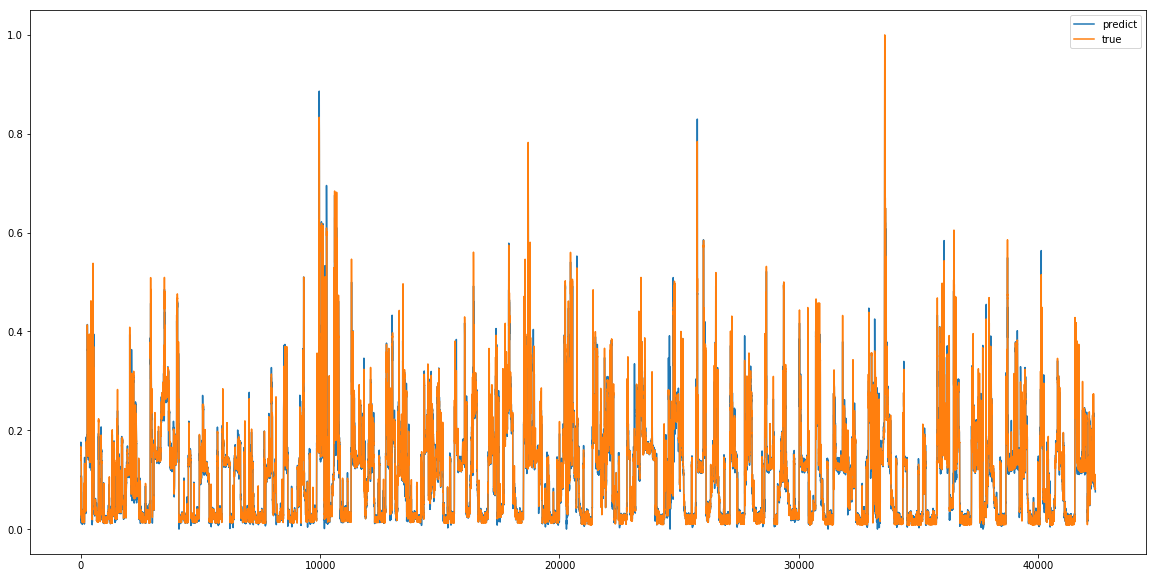

Test RMSE: 0.02214
Test MAE: 0.00940


In [56]:
from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
mae=mean_absolute_error(testY,yhat)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

In [57]:
from tensorflow.keras.models import *

In [79]:
first_input = Input(shape=(None,60,7))

in1=TimeDistributed(LSTM(units =150 , return_sequences=True))(first_input)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))

#in1=Dropout(0.2)(in1)
out1=TimeDistributed(Dense(12, activation = 'relu'))(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')




In [101]:
first_input = Input(shape=(60,7))

in1=LSTM(units =150 , return_sequences=True)(first_input)

in1=Conv1D(filters=64, kernel_size=5, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in1)
in1=Conv1D(filters=64, kernel_size=3, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

in1=Flatten()(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))

#in1=Dropout(0.2)(in1)
out1=Dense(1, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')



In [102]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 60, 7)]           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 150)           94800     
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 56, 64)            48064     
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 54, 64)            12352     
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 54, 64)            4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 27, 64)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1728)              0  

In [103]:
checkpoint_path = "saved_weights/house_lstmcnn150_5_1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [104]:
history=model.fit(trainX, trainY, epochs=20, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 339560 samples, validate on 42392 samples
Epoch 1/20
339500/339560 [============================>.] - ETA: 0s - loss: 7.1722e-04
Epoch 00001: val_loss improved from inf to 0.00066, saving model to saved_weights/house_lstmcnn150_5_1.hdf5
339560/339560 [==============================] - 202s 596us/sample - loss: 7.1711e-04 - val_loss: 6.6499e-04
Epoch 2/20
339500/339560 [============================>.] - ETA: 0s - loss: 5.0861e-04
Epoch 00002: val_loss improved from 0.00066 to 0.00066, saving model to saved_weights/house_lstmcnn150_5_1.hdf5
339560/339560 [==============================] - 188s 554us/sample - loss: 5.0855e-04 - val_loss: 6.5642e-04
Epoch 3/20
339500/339560 [============================>.] - ETA: 0s - loss: 4.8200e-04
Epoch 00003: val_loss improved from 0.00066 to 0.00065, saving model to saved_weights/house_lstmcnn150_5_1.hdf5
339560/339560 [==============================] - 187s 551us/sample - loss: 4.8202e-04 - val_loss: 6.5030e-04
Epoch 4/20
339500/339560 [===

In [95]:
model.load_weights("saved_weights/house_lstmcnn150_5_1.hdf5")

In [89]:

yhat = model.predict([testX])
yhat.shape

(42393, 1)

In [90]:
testY.shape

(42393,)

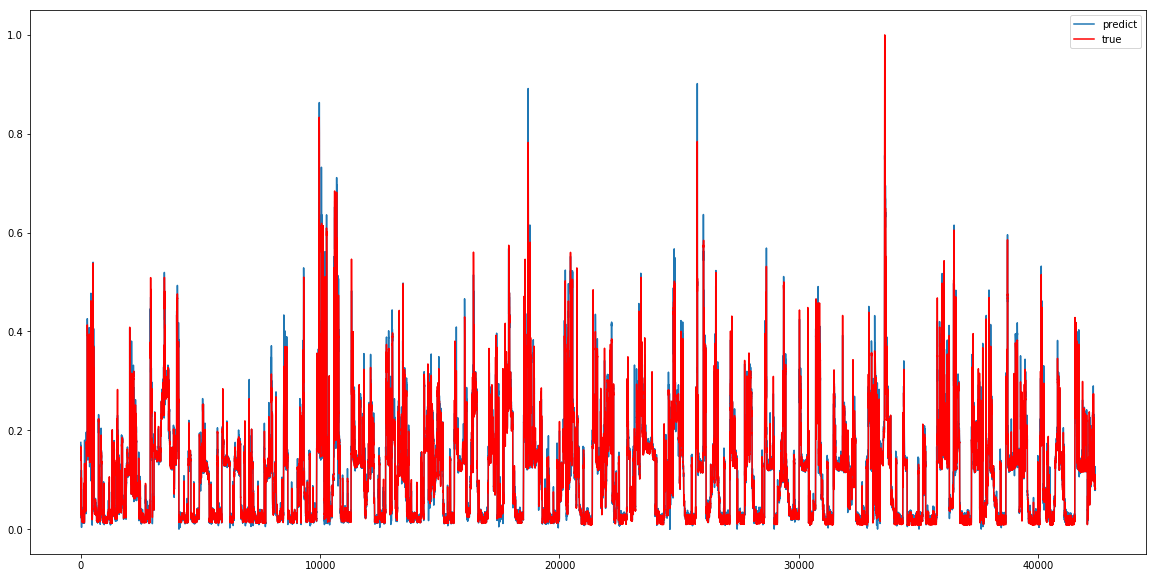

Test RMSE: 0.02137
Test MAE: 0.00910
Test MSE: 0.00046


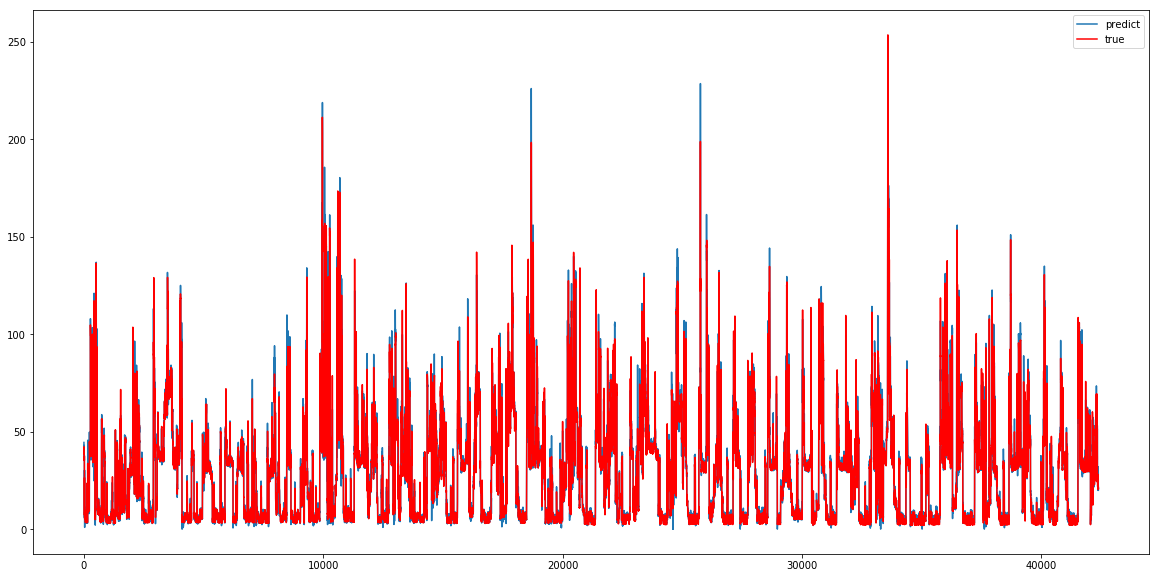

Test RMSE: 5.41792
Test MAE: 2.30702


In [96]:
###lstm(150)-1cnn(5,1) ,saved_weights/timedistribute_sml100_lstmcnn100_5_1.hdf5

from matplotlib import pyplot
from sklearn.metrics import *

yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY,'r', label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse,'r', label='true')
pyplot.legend()
pyplot.show()

rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(yhat_inverse, testY_inverse)
print('Test MAE: %.5f' % mae)

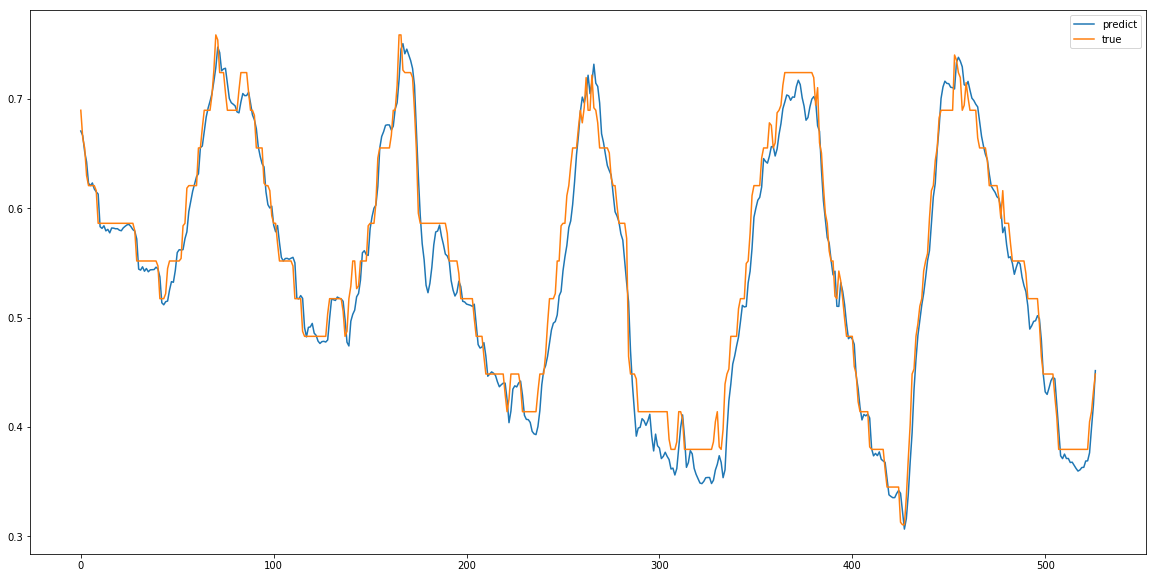

Test RMSE: 0.02015
Test MAE: 0.01552
Test MSE: 0.00041


In [190]:
### lstm(100)-1dcnn(3,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5
## 3200 400 537

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

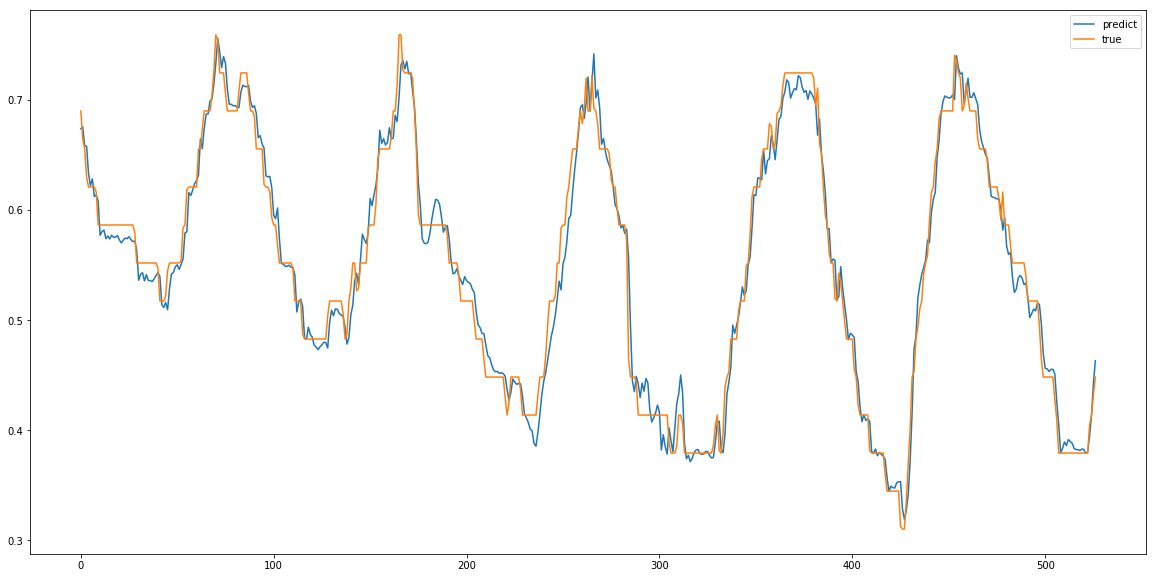

In [151]:
### lstm(200)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5
## 3200 400 537

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()

In [152]:
from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

Test RMSE: 0.01710
Test MAE: 0.01311
Test MSE: 0.00029


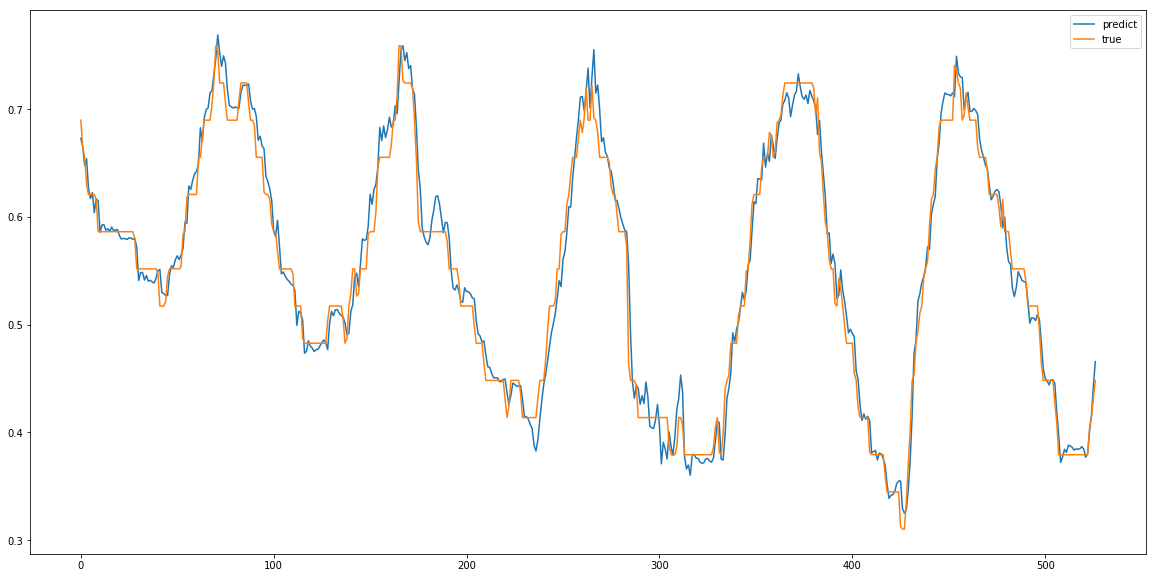

Test RMSE: 0.01743
Test MAE: 0.01336
Test MSE: 0.00030


In [156]:
### lstm(200)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5
## 3200 400 537

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

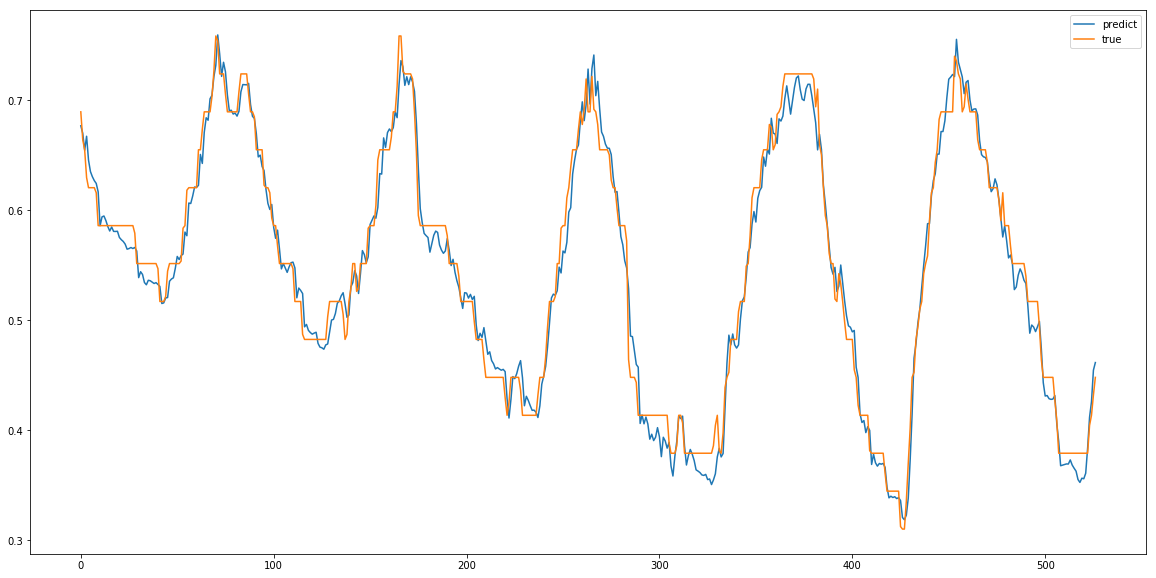

Test RMSE: 0.01698
Test MAE: 0.01339
Test MSE: 0.00029


In [166]:
### lstm(250)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5
## 3200 400 537

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

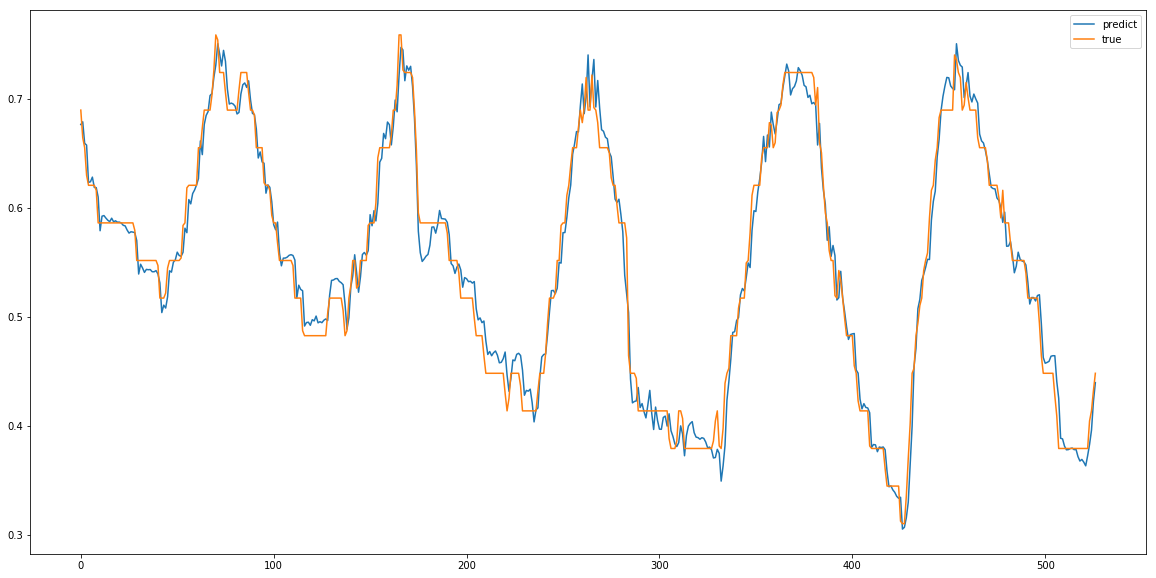

Test RMSE: 0.01656
Test MAE: 0.01273
Test MSE: 0.00027


In [180]:
### lstm(150)-1dcnn(5,1) "saved_weights/timedistribute_sml100_lstmcnn1.hdf5
## 3200 400 537

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

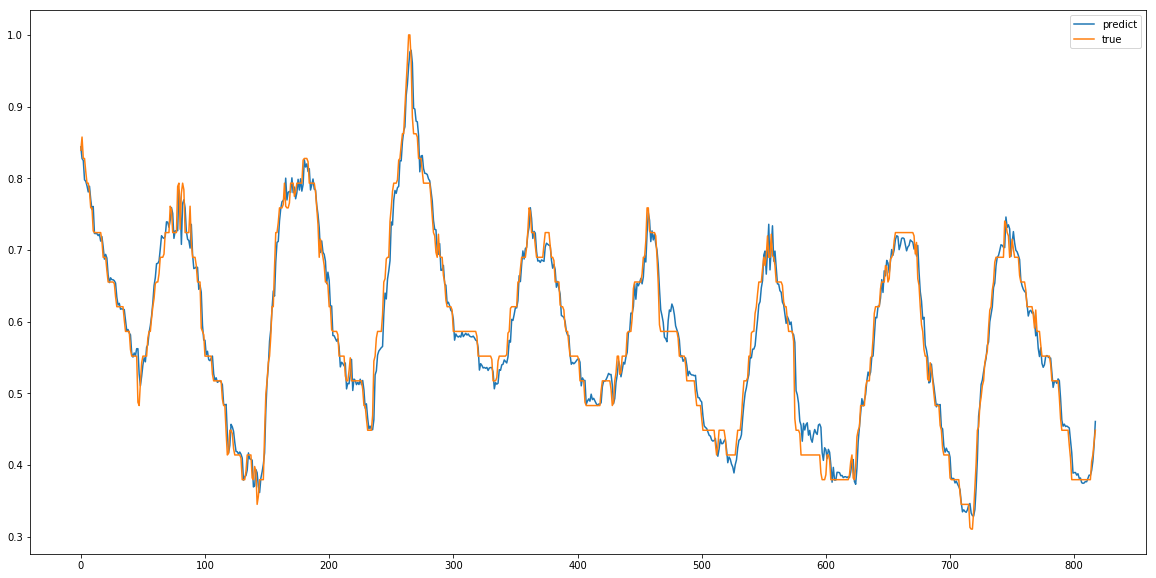

In [86]:
### lstm(100)-1dcnn(3,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

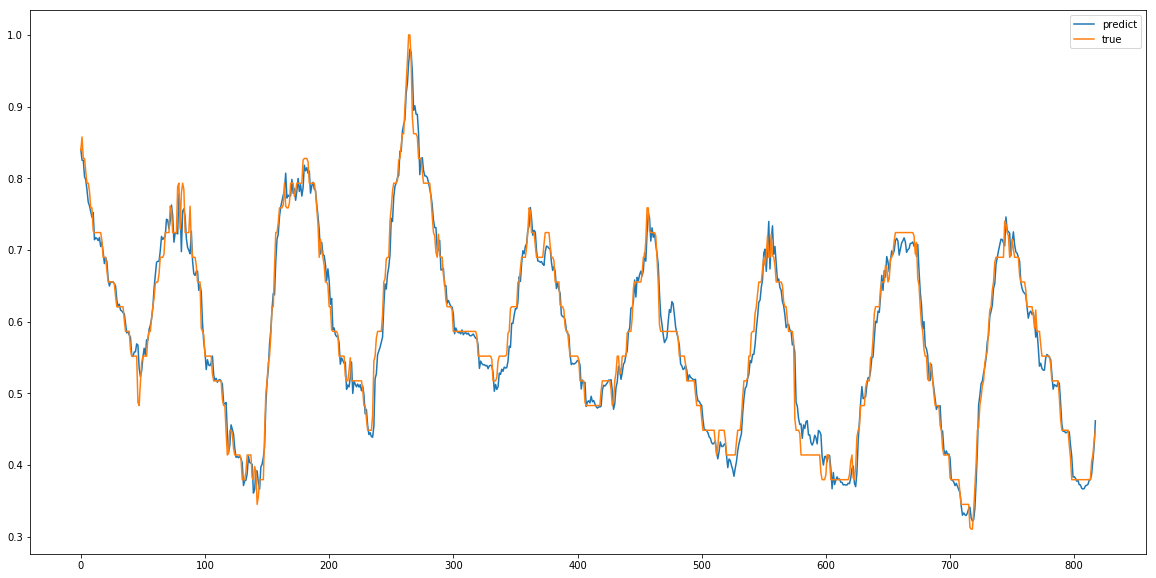

In [91]:
### lstm(100)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

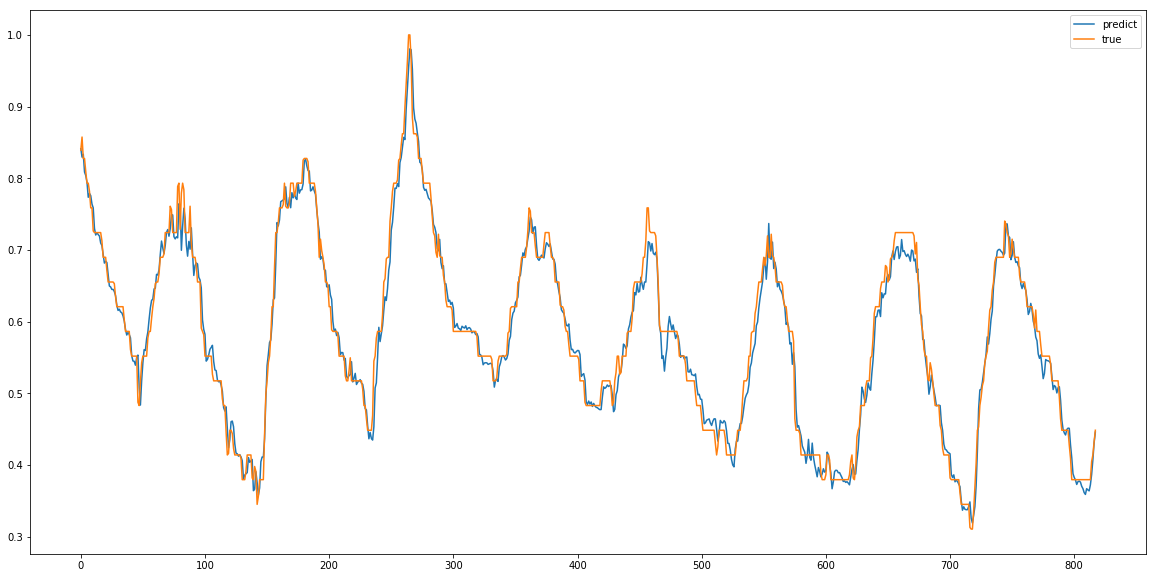

In [97]:
### lstm(100)-1dcnn(5,3,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

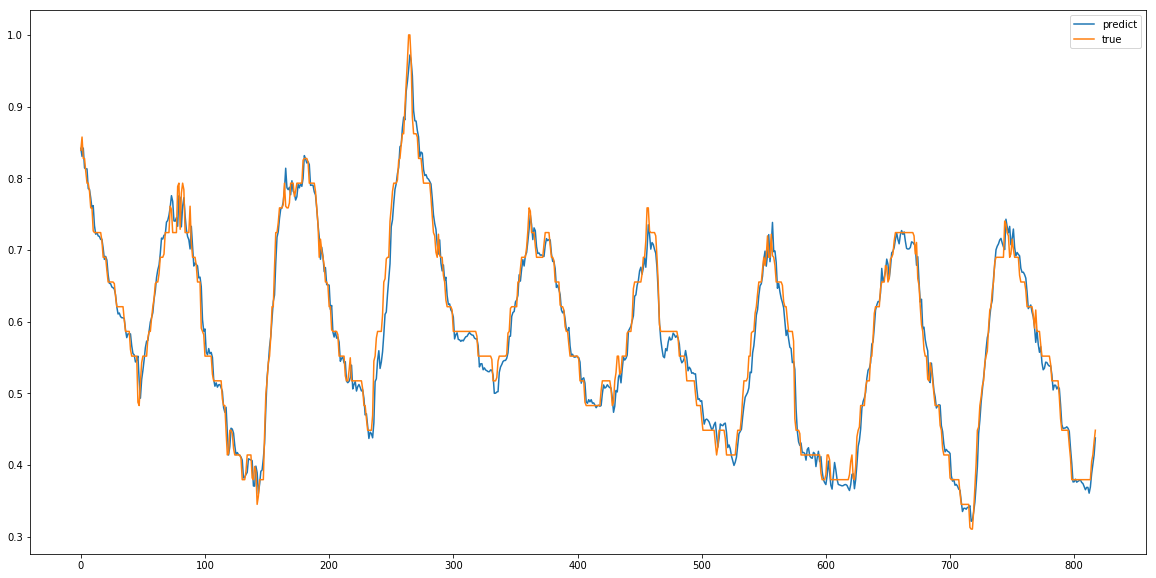

In [125]:
### lstm(200)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

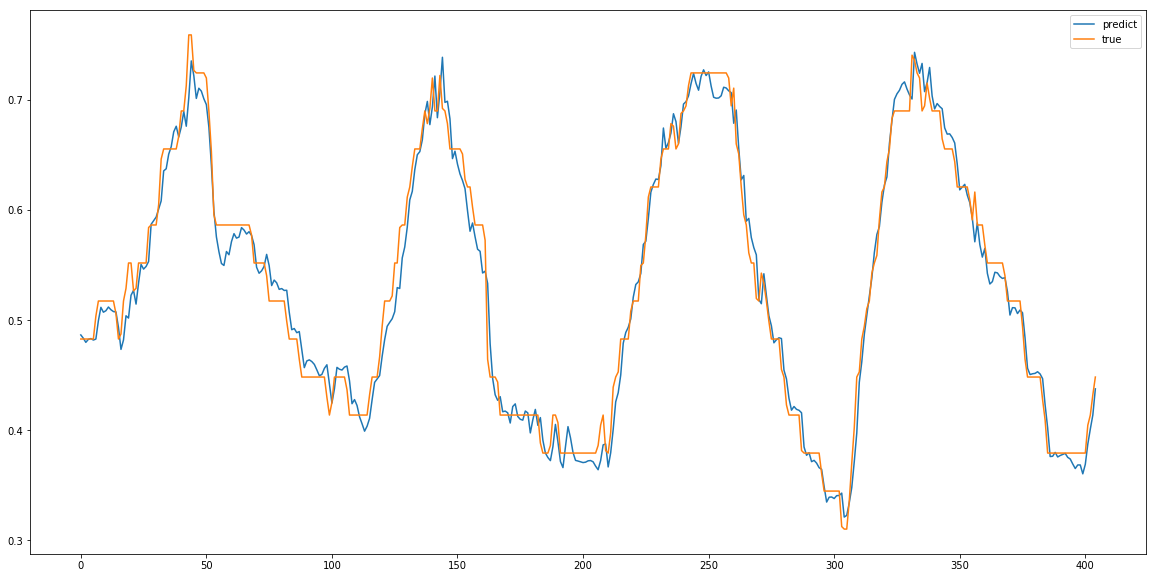

Test RMSE: 0.01734
Test MAE: 0.01334
Test MSE: 0.00030


In [139]:
### lstm(200)-1dcnn(5,1), "saved_weights/timedistribute_sml100_lstmcnn1.hdf5

from matplotlib import pyplot
yhat = model.predict([test1X])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test1Y, label='true')
pyplot.legend()
pyplot.show()


from math import *
rmse = sqrt(mean_squared_error(test1Y, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test1Y, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(test1Y, yhat)
print('Test MSE: %.5f' % mse)

In [87]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01916


In [92]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01900


In [98]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01951


In [130]:
from math import *
from sklearn.metrics import *

rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

Test RMSE: 0.01843
Test MAE: 0.01359
Test MSE: 0.00034


In [ ]:
### lstm(200)-1dcnn

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

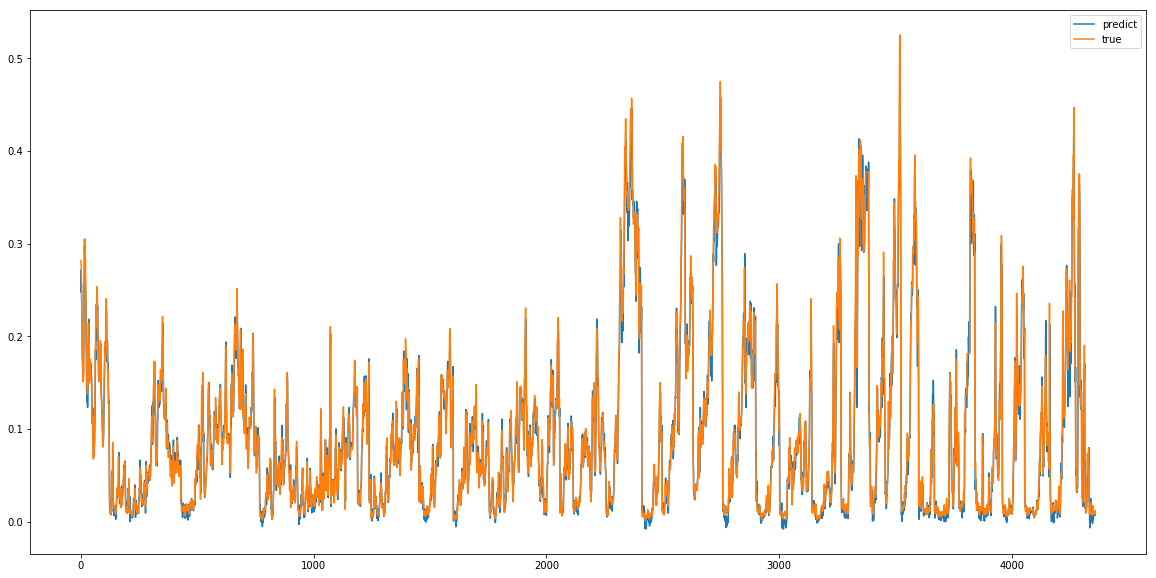

In [30]:
from matplotlib import pyplot
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

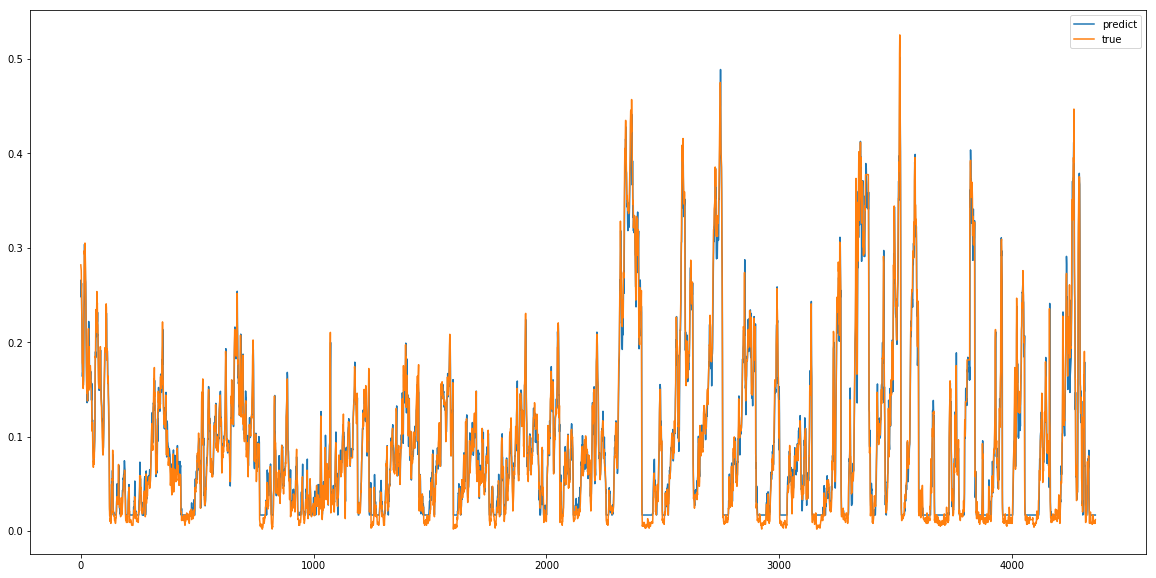

In [34]:
from matplotlib import pyplot
yhat = model.predict([testX])

plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [130]:
yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)

In [132]:
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)

In [133]:
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.078


### attention cnn, cnn, rescnn 순서

In [14]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01871


In [31]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01857


In [35]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01849


In [338]:
##convlstm

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01964


In [350]:
##convlstm

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01986


In [376]:

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01869


In [86]:
from tensorflow.keras.models import Model


def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

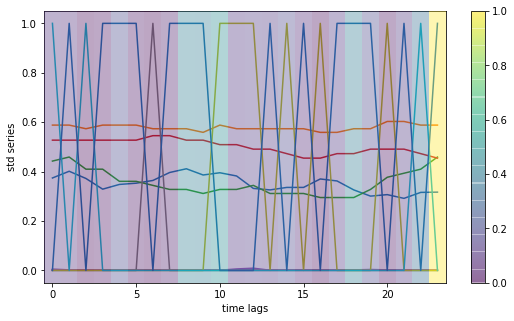

In [107]:
from scipy.ndimage import zoom
import random
id_=random.randint(0,len(testX))


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)

plt.figure(figsize=(9,5))
plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

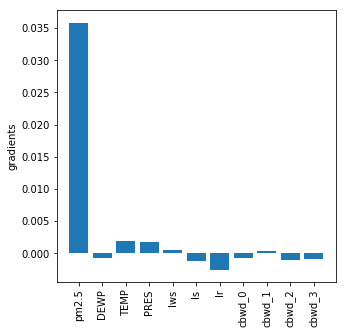

In [106]:
columns=data.columns[5:]

grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(5,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)